In [46]:
import numpy as np
import pandas as pd
from PIL import Image
import cv2
import os
import random
import itertools
import seaborn 
from tensorflow import keras
from keras.utils import np_utils 
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Activation, MaxPooling2D, Flatten , Conv2D, Dropout, Dense
import matplotlib.pyplot as plt
import matplotlib.image as img

In [166]:
f_path = [] 
for filename in os.listdir(dir):
    file_path = os.path.join(dir, filename)
    f_path.append(file_path)

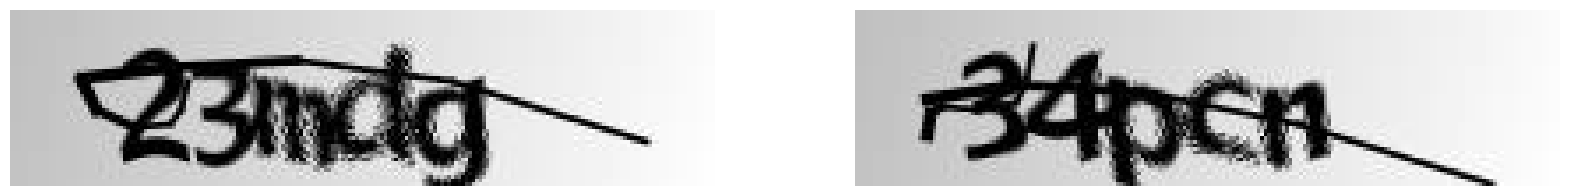

In [157]:
def plot_ (img1, img2) :
    plt.figure(figsize = (20,5))
    
    plt.subplot(1,2,1)
    plt.imshow(img1, 'gray')
    
    plt.axis('off')
    
    plt.subplot(1,2,2)
    plt.imshow(img2, 'gray')
    
    plt.axis('off')

image1 = cv2.imread('/kaggle/input/captcha-version-2-images/samples/23mdg.png', cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread('/kaggle/input/captcha-version-2-images/samples/34pcn.png', cv2.IMREAD_GRAYSCALE)

plot_(image1, image2)

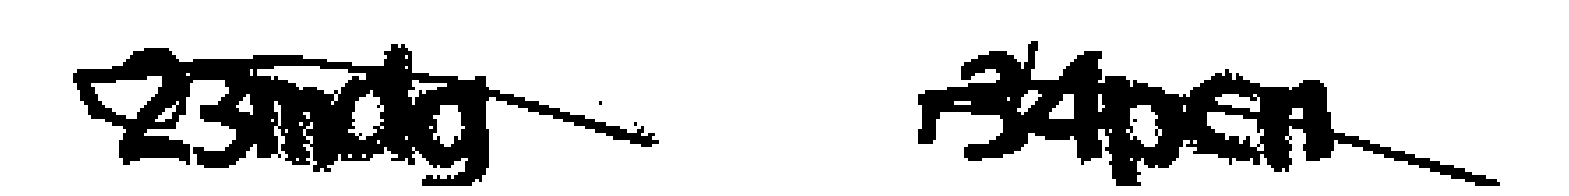

In [159]:
# Adaptive Thresholding

t_img1 = cv2.adaptiveThreshold(image1, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 145, 0)
t_img2 = cv2.adaptiveThreshold(image2, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 145, 0)

plot_(t_img1, t_img2)

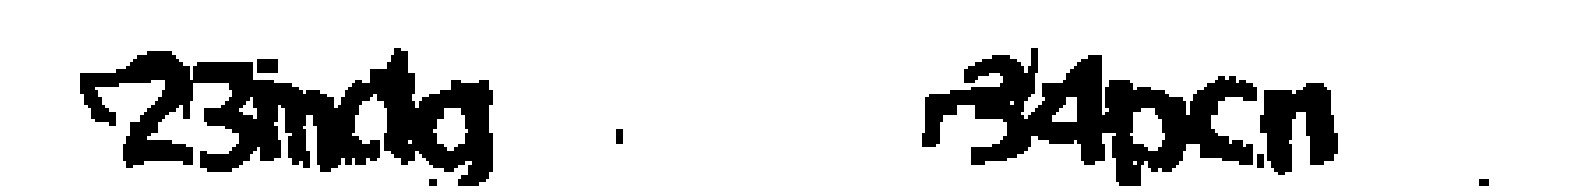

In [160]:
# Closing

kernel = np.ones((5,5),np.uint8)
c_img1 = cv2.morphologyEx(t_img1, cv2.MORPH_CLOSE, np.ones((4,2), np.uint8))
c_img2 = cv2.morphologyEx(t_img2, cv2.MORPH_CLOSE, np.ones((4,2), np.uint8))
plot_(c_img1, c_img2)

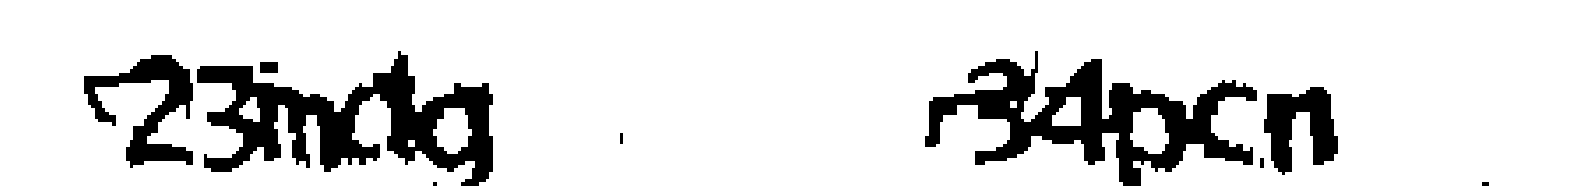

In [161]:
# Dilation

d_img1 = cv2.dilate(c_img1, np.ones((2,2), np.uint8), iterations = 1)
d_img2 = cv2.dilate(c_img2, np.ones((2,2), np.uint8), iterations = 1)

plot_(d_img1, d_img2)

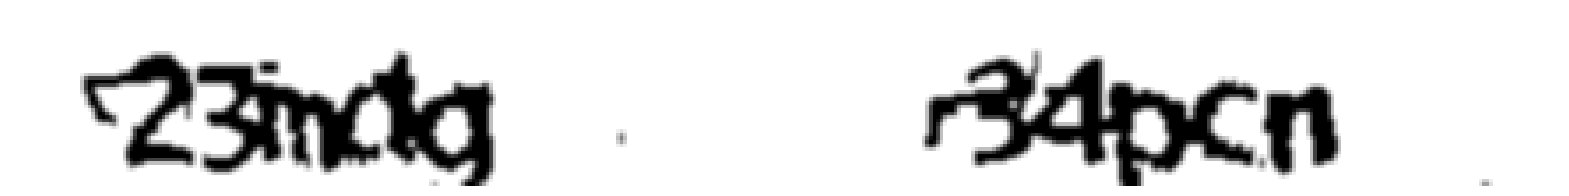

In [162]:
# Gaussian Blur (Blurring)

b_img1 = cv2.GaussianBlur(d_img1, (3,3), 0)
b_img2 = cv2.GaussianBlur(d_img2, (3,3), 0)

plot_(b_img1, b_img2)

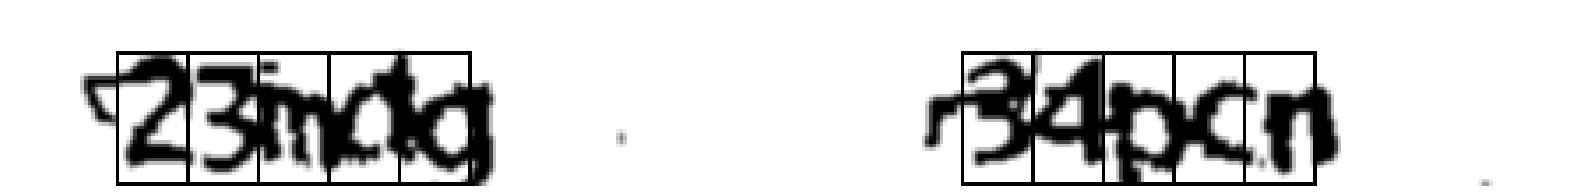

In [164]:
cv2.rectangle(b_img1, (30,12), (50,49), 0, 1)
cv2.rectangle(b_img1, (50,12), (70,49), 0, 1)
cv2.rectangle(b_img1, (70,12), (90,49), 0, 1)
cv2.rectangle(b_img1, (90,12), (110,49),0, 1)
cv2.rectangle(b_img1, (110,12),(130,49),0, 1)

cv2.rectangle(b_img2, (30,12), (50,49), 0, 1)
cv2.rectangle(b_img2, (50,12), (70,49), 0, 1)
cv2.rectangle(b_img2, (70,12), (90,49), 0, 1)
cv2.rectangle(b_img2, (90,12), (110,49),0, 1)
cv2.rectangle(b_img2, (110,12),(130,49),0, 1)

plot_(b_img1, b_img2)

In [165]:
def t_img(img):
    return cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 145, 0)
def c_img(img):
    return cv2.morphologyEx(img, cv2.MORPH_CLOSE, np.ones((4,2), np.uint8))
def d_img(img):
    return cv2.dilate(img, np.ones((2,2), np.uint8), iterations = 1)
def b_img(img):
    return cv2.GaussianBlur(img, (3,3), 0)

In [174]:
X = []
y = []

for path in f_path:
    if os.path.exists(path):
        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

        if img is not None:
            img = t_img(img)
            img = c_img(img)
            img = d_img(img)
            img = b_img(img)
            
            image_list = [img[10:50, 30:50], img[10:50, 50:70], img[10:50, 70:90], img[10:50, 90:110], img[10:50, 110:130]]
            
            for i in range(5):
                X.append(np.asarray(image_list[i]))
                y.append(path[-9:-4][i])
#         X.append(img_to_array(Image.fromarray(image_list[i])))
        else:
            print(f"Failed to load image: {path}")
    else:
        print(f"Image file not found: {path}")
        
X=np.array(X)
y=np.array(y)

Failed to load image: /kaggle/input/captcha-version-2-images/samples/samples


In [175]:
print(X)
print(y)

[[[255 255 255 ... 255 255 191]
  [255 255 255 ... 255 255 191]
  [255 255 255 ... 191 207 191]
  ...
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]]

 [[128 191 255 ... 255 255 255]
  [128 191 255 ... 255 255 255]
  [159 207 255 ... 255 255 255]
  ...
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]]

 [[255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  ...
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]]

 ...

 [[255 255 255 ... 255 255 255]
  [191 207 239 ... 255 255 255]
  [ 64  96 159 ... 255 255 255]
  ...
  [255 255 255 ... 239 223 239]
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]]

 [[255 255 255 ... 255 255 255]
  [255 255 255 ... 191 207 239]
  [255 255 255 ...  64 112 207]
  ...
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 2

In [176]:
X = X.astype('float32')
X /= 255.0

In [177]:
print(X)

[[[1.         1.         1.         ... 1.         1.         0.7490196 ]
  [1.         1.         1.         ... 1.         1.         0.7490196 ]
  [1.         1.         1.         ... 0.7490196  0.8117647  0.7490196 ]
  ...
  [1.         1.         1.         ... 1.         1.         1.        ]
  [1.         1.         1.         ... 1.         1.         1.        ]
  [1.         1.         1.         ... 1.         1.         1.        ]]

 [[0.5019608  0.7490196  1.         ... 1.         1.         1.        ]
  [0.5019608  0.7490196  1.         ... 1.         1.         1.        ]
  [0.62352943 0.8117647  1.         ... 1.         1.         1.        ]
  ...
  [1.         1.         1.         ... 1.         1.         1.        ]
  [1.         1.         1.         ... 1.         1.         1.        ]
  [1.         1.         1.         ... 1.         1.         1.        ]]

 [[1.         1.         1.         ... 1.         1.         1.        ]
  [1.         1.      

In [178]:
print(X.shape)
print(y.shape)

(5350, 40, 20)
(5350,)


[]

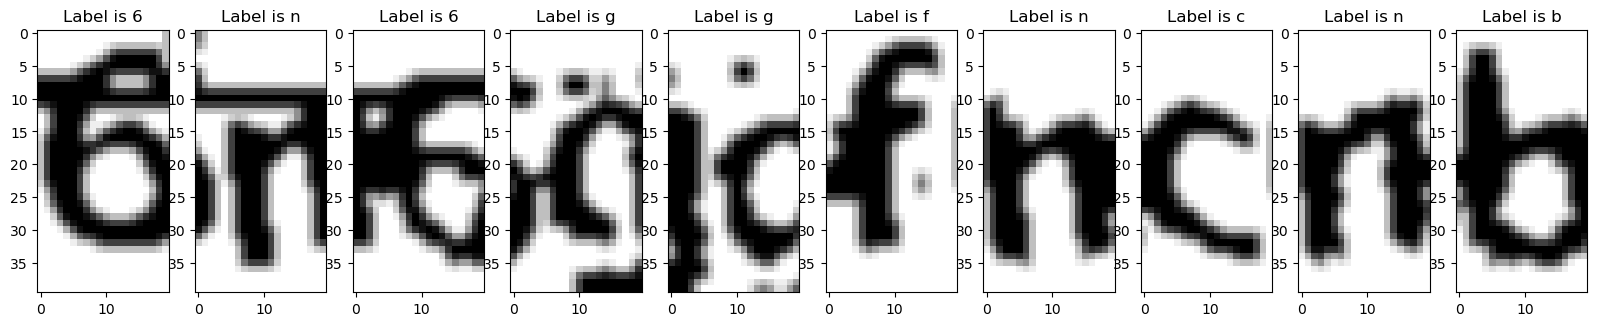

In [180]:
plt.figure(figsize = (20,5))
for i in range(10) :
    plt.subplot(1,10,i+1)
    plt.imshow(X[i], 'gray')
    plt.title('Label is ' + str(y[i]))
plt.plot()

In [181]:
labelcounts = {}
y_values = set(y)
for value in y_values:
    count = 0
    for element in y:
        if element == value:
            count += 1
    labelcounts[value] = count
    print('Occurrence count of ' + str(value) + ' : ' + str(count))

Occurrence count of 8 : 272
Occurrence count of p : 259
Occurrence count of c : 276
Occurrence count of d : 269
Occurrence count of g : 281
Occurrence count of 6 : 267
Occurrence count of w : 244
Occurrence count of 2 : 270
Occurrence count of f : 277
Occurrence count of y : 240
Occurrence count of 4 : 289
Occurrence count of n : 540
Occurrence count of 7 : 262
Occurrence count of 3 : 271
Occurrence count of b : 247
Occurrence count of m : 282
Occurrence count of 5 : 288
Occurrence count of e : 245
Occurrence count of x : 271


In [182]:
labelcounts

{'8': 272,
 'p': 259,
 'c': 276,
 'd': 269,
 'g': 281,
 '6': 267,
 'w': 244,
 '2': 270,
 'f': 277,
 'y': 240,
 '4': 289,
 'n': 540,
 '7': 262,
 '3': 271,
 'b': 247,
 'm': 282,
 '5': 288,
 'e': 245,
 'x': 271}

In [183]:
labelcounts_df = pd.DataFrame({'labels': labelcounts.keys(), 'Count': labelcounts.values()})

In [184]:
labelcounts_df

,labels,Count
0,8,272
1,p,259
2,c,276
3,d,269
4,g,281
5,6,267
6,w,244
7,2,270
8,f,277
9,y,240


Text(0.5, 1.0, 'Label distribution in labelcounts')

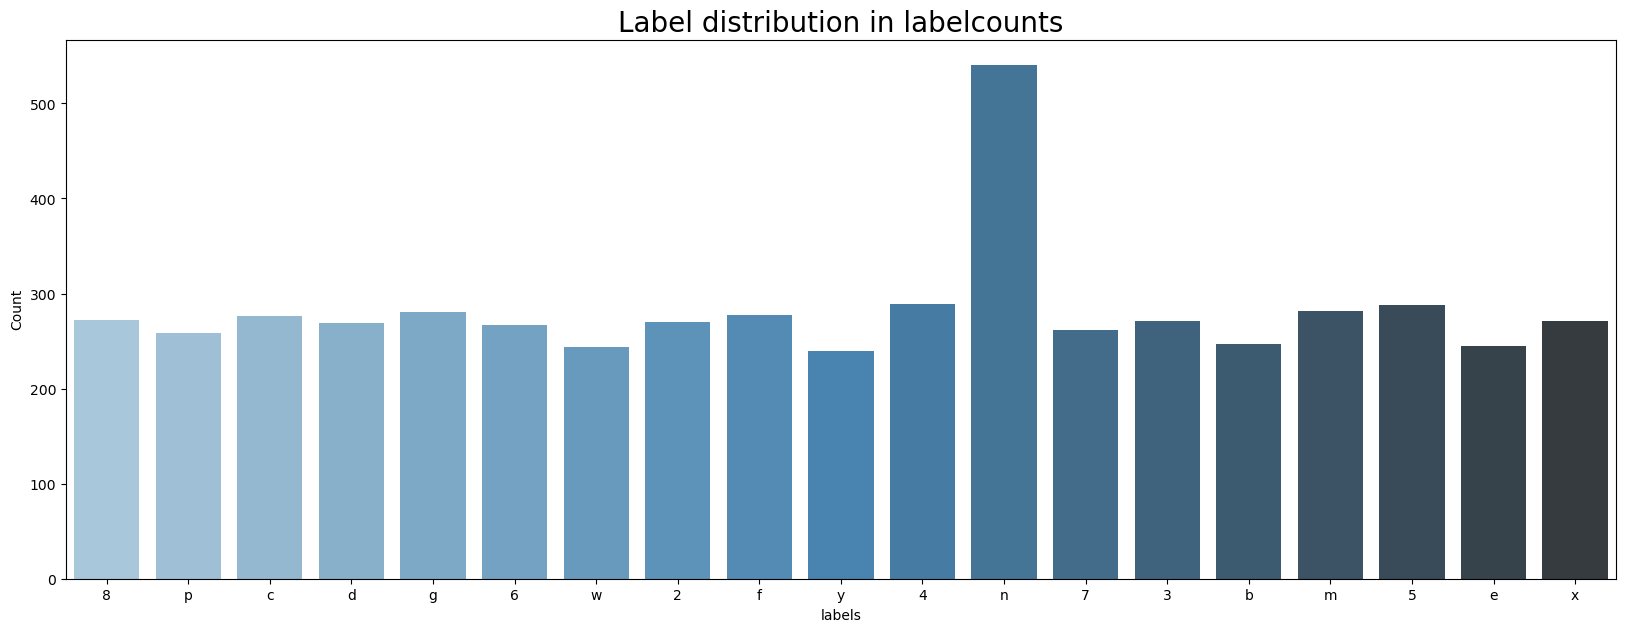

In [185]:
plt.figure(figsize = (20,7))
seaborn.barplot(x = 'labels', y = 'Count', data = labelcounts_df, palette = 'Blues_d')
plt.title('Label distribution in labelcounts', fontsize = 20)

In [186]:
label_encoder = LabelEncoder()
y_cat = label_encoder.fit_transform(y)

onehot_encoder = OneHotEncoder(sparse_output=False)
y_one_hot = onehot_encoder.fit_transform(y_cat.reshape(len(y_cat), 1))

In [190]:
print(y)
print(y_cat)

print(y_one_hot)

['6' 'n' '6' ... 'd' '5' '2']
[ 4 14  4 ...  9  3  0]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


In [191]:
print(X.shape)
print(y_one_hot.shape)

(5350, 40, 20)
(5350, 19)


In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=42)

In [125]:
# Mapping categorical labels to original labels

info = {}
for i in range(len(y_cat)):
    info[y_cat[i]] = y[i]

In [192]:
info

{4: '6',
 14: 'n',
 12: 'g',
 11: 'f',
 8: 'c',
 7: 'b',
 17: 'x',
 0: '2',
 16: 'w',
 10: 'e',
 2: '4',
 5: '7',
 18: 'y',
 6: '8',
 13: 'm',
 15: 'p',
 3: '5',
 1: '3',
 9: 'd'}

Text(0.5, 1.0, 'Label distribution in y_test_cat_df')

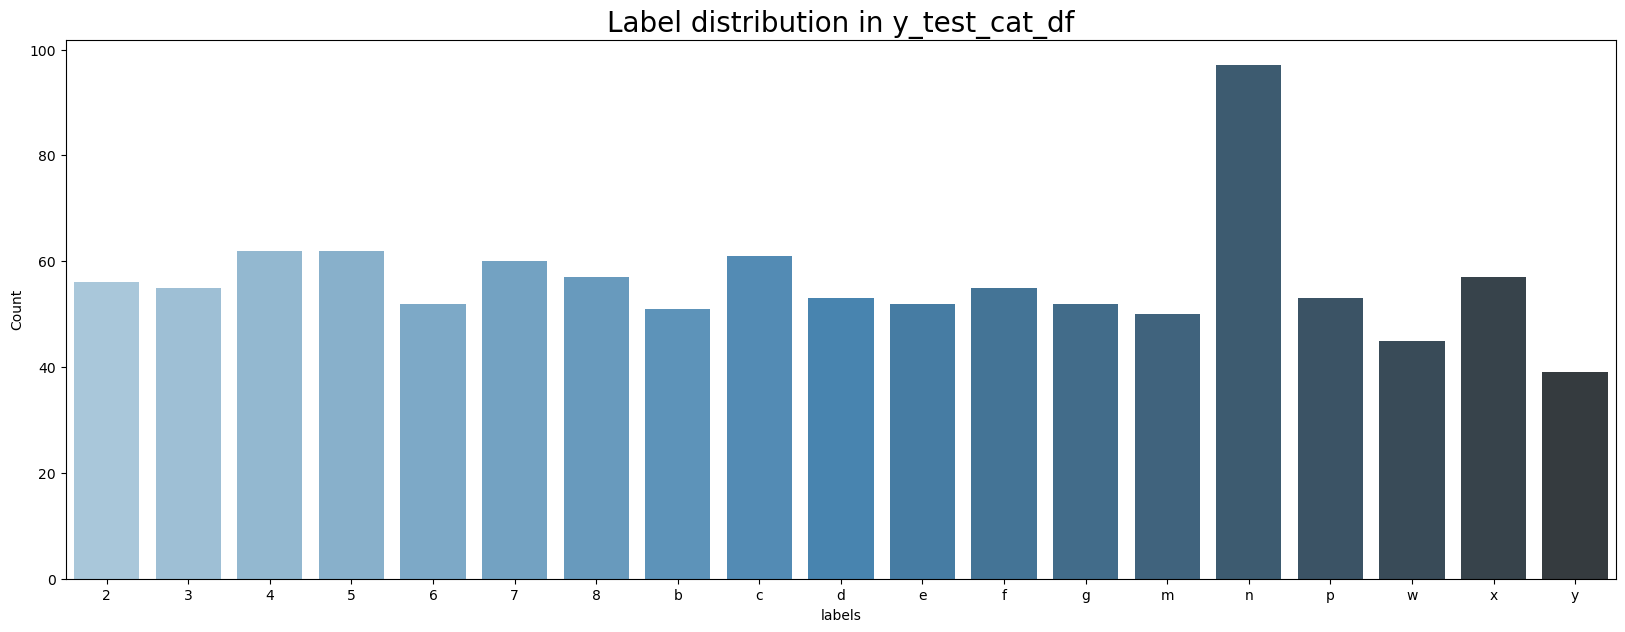

In [193]:
y_test_cat = np.argmax(y_test, axis=1)
labels, counts = np.unique(y_test_cat, return_counts=True)


label_names = []
for label in labels:
    label_names.append(info[label])

y_test_cat_df = pd.DataFrame({'labels': label_names, 'Count': counts})

plt.figure(figsize = (20,7))
seaborn.barplot(x = 'labels', y = 'Count', data = y_test_cat_df, palette = 'Blues_d')
plt.title('Label distribution in y_test_cat_df', fontsize = 20)

In [197]:
print(X_train.shape)
print(y_train.shape)
print()

print(X_test.shape)
print(y_test.shape)
print()

print(y_cat.shape)
y_cat_unique_shape = np.unique(y_cat)
print(y_cat_unique_shape, len(y_cat_unique_shape))

(4276, 40, 20)
(4276, 19)

(1069, 40, 20)
(1069, 19)

(5350,)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18] 19


In [76]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(3,3), padding='same', activation='relu', input_shape=(40, 20, 1)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
# model.add(Dropout(0.4))
model.add(Dense(1500, activation='relu'))
# model.add(Dropout(0.2))
model.add(Dense(len(y_cat_unique_shape), activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 40, 20, 16)        160       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 20, 10, 16)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 20, 10, 32)        4640      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 10, 5, 32)        0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 10, 5, 128)        36992     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 5, 2, 128)       

In [77]:
batch_size = 64
epochs = 150
validation_split = 0.2

model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, 
          validation_split=validation_split, shuffle=True)

Epoch 1/150
54/54 [==============================] - 4s 53ms/step - loss: 2.4451 - accuracy: 0.2491 - val_loss: 1.3812 - val_accuracy: 0.6332
Epoch 2/150
54/54 [==============================] - 3s 48ms/step - loss: 1.0604 - accuracy: 0.7038 - val_loss: 0.6732 - val_accuracy: 0.8072
Epoch 3/150
54/54 [==============================] - 3s 49ms/step - loss: 0.6417 - accuracy: 0.8082 - val_loss: 0.5581 - val_accuracy: 0.8423
Epoch 4/150
54/54 [==============================] - 3s 51ms/step - loss: 0.4891 - accuracy: 0.8541 - val_loss: 0.4828 - val_accuracy: 0.8575
Epoch 5/150
54/54 [==============================] - 3s 48ms/step - loss: 0.3850 - accuracy: 0.8816 - val_loss: 0.4737 - val_accuracy: 0.8470
Epoch 6/150
54/54 [==============================] - 3s 48ms/step - loss: 0.3328 - accuracy: 0.8930 - val_loss: 0.4743 - val_accuracy: 0.8692
Epoch 7/150
54/54 [==============================] - 3s 48ms/step - loss: 0.2776 - accuracy: 0.9108 - val_loss: 0.4534 - val_accuracy: 0.8633
Epoch 

In [198]:
scores = model.evaluate(X_test, y_test, verbose=3)
print('loss:', scores[0])
print('accuracy:', scores[1])

loss: 1.6563516855239868
accuracy: 0.8783910274505615


In [242]:
def pred(pred_imgs):
    
    for path in pred_imgs:
        X_pred = []
#         y_img = []
        if os.path.exists(path):
            img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

            if img is not None:
                print('Image: ', end='')
                plt.imshow(img, 'gray')
                plt.axis('off')
                plt.show()

                img = t_img(img)
                img = c_img(img)
                img = d_img(img)
                img = b_img(img)

                image_list = [img[10:50, 30:50], img[10:50, 50:70], img[10:50, 70:90], img[10:50, 90:110], img[10:50, 110:130]]

                for i in range(5):
                    X_pred.append(np.asarray(image_list[i]))

                    # y_img.append(path[-9:-4][i])
                    # X.append(img_to_array(Image.fromarray(image_list[i])))

                X_pred =np.array(X_pred)
#                 y_img = np.array(y_img)
                X_pred = X_pred.astype('float32')
                X_pred /= 255.0

                y_pred = model.predict(X_pred)
    #             print(y_pred)
                y_pred_class = np.argmax(y_pred, axis=1)

                print('Prediction: ', end='')
                for i in y_pred_class:
                    print(info[i], end='')
                print()
                print()
            else:
                print(f"Failed to load image: {path}")
        else:
            print(f"Image file not found: {path}")

Image: 

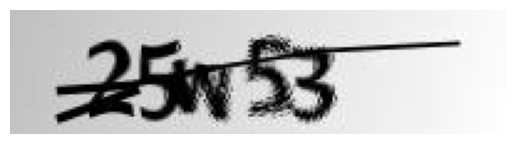

1/1 [==============================] - 0s 25ms/step
Prediction: 25w53

Image: 

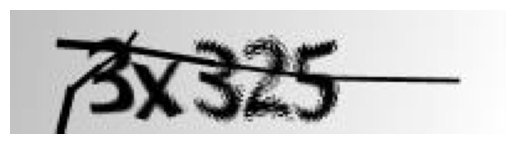

1/1 [==============================] - 0s 24ms/step
Prediction: 3x325

Image: 

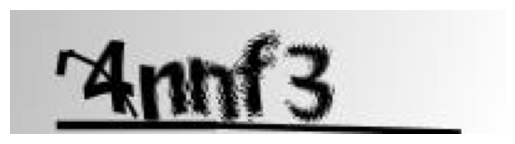

1/1 [==============================] - 0s 29ms/step
Prediction: 4nnf3

Image: 

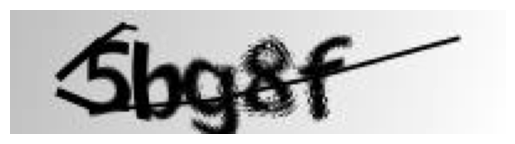

1/1 [==============================] - 0s 25ms/step
Prediction: 5bg8f



In [244]:
pred_imgs = ['/kaggle/input/captcha-version-2-images/samples/25w53.png', '/kaggle/input/captcha-version-2-images/samples/3x325.png', '/kaggle/input/captcha-version-2-images/samples/4nnf3.png', '/kaggle/input/captcha-version-2-images/samples/5bg8f.png']
pred(pred_imgs)

In [ ]:
# import random
# random_elements = random.sample(f_path, 500)

# label_encode = LabelEncoder()
# y_img_cat = label_encode.fit_transform(y_img)

# onehot_encoder = OneHotEncoder(sparse_output=False)
# y_img_one_hot = onehot_encoder.fit_transform(y_img_cat.reshape(len(y_img_cat), 1))

In [ ]:
# from keras.utils import to_categorical

# y_eval_one_hot = to_categorical(y_img_cat, num_classes=19)

In [ ]:
# print(X_img.shape)
# print(y_img_one_hot.shape)


# print(y_img_cat.shape)
# y_img_cat_unique_shape = np.unique(y_img_cat)
# print(y_img_cat_unique_shape, len(y_img_cat_unique_shape))

In [ ]:
# score = model.evaluate(X_img, y_eval_one_hot, verbose=3)
# print('loss:', score[0])
# print('accuracy:', score[1])


# y_pred = model.predict(X_pred)
# for _ in y_pred:
#     y_pred_class = np.argmax(y_pred, axis=1)

# print('Prediction: ', end='')
# for i in y_pred_class:
#     print(info[i], end='')